# Simple orders analysis

🚀 We are finally ready to start analysing our `orders` dataset!

Our objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [12]:
# Import Modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=False)


In [15]:
# Check your shape below

# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13:
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False
else:
    assert(orders.shape == (96353, 12))


## 1 - Inspect features

👉 Print summary statistics of each column of the order dataset (then focus in particular on `wait_time`)

In [16]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_items,number_of_sellers,price,freight_value
count,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000
mean,12.522869,23.741881,0.754903,0.592187,0.097610,4.155688,1.141687,1.013918,136.654623,22.757810
std,9.457183,8.759019,4.656481,0.491431,0.296788,1.284979,0.535362,0.123616,207.444085,21.496018
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,6.763530,18.335243,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.840000
50%,10.211944,23.233113,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.160000
75%,15.685278,28.411979,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,23.990000
max,208.351759,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000


📈 Plot histograms to get a sense of the distribution of each numerical feature.

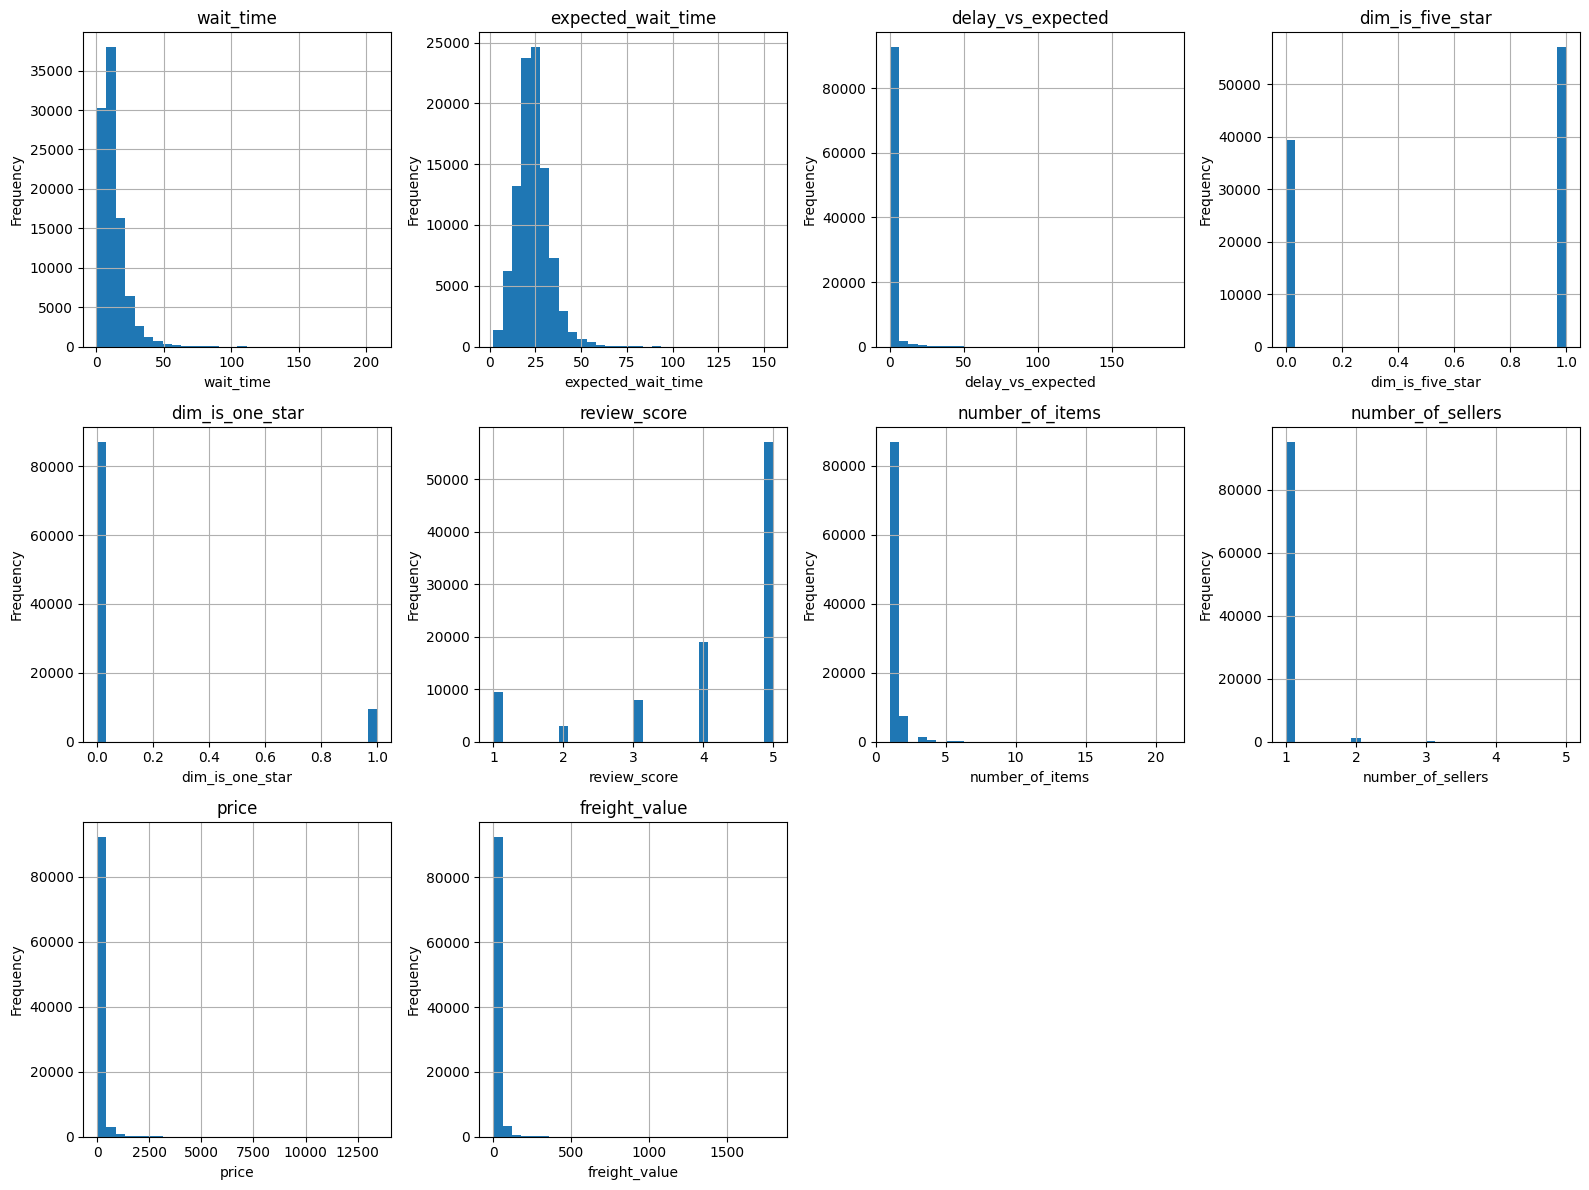

In [18]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

numerical_cols = orders.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numerical_cols):
    if i < len(axes):
        orders[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

👀 In particular, create a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`

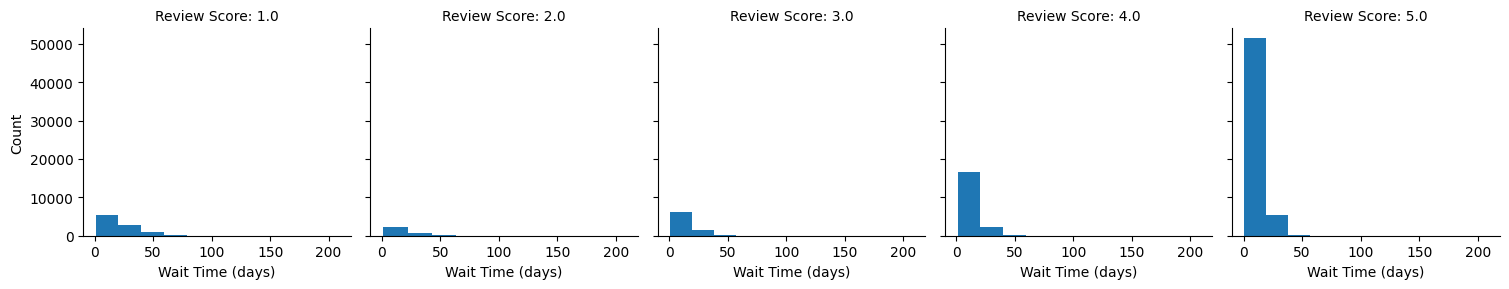

In [23]:
g = sns.FacetGrid(orders, col='review_score')
g.map(plt.hist, 'wait_time', bins=10)
g.set_axis_labels('Wait Time (days)', 'Count')
g.set_titles('Review Score: {col_name}')
plt.show()

❓ What do you notice for the variables `price` and `freight_value` ? 

❓ Have a look at the  `distance_seller_customer` feature if you have created it in `order.py`

Price statistics:
count    96353.000000
mean       136.654623
std        207.444085
min          0.850000
25%         45.900000
50%         86.000000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

Freight value statistics:
count    96353.000000
mean        22.757810
std         21.496018
min          0.000000
25%         13.840000
50%         17.160000
75%         23.990000
max       1794.960000
Name: freight_value, dtype: float64


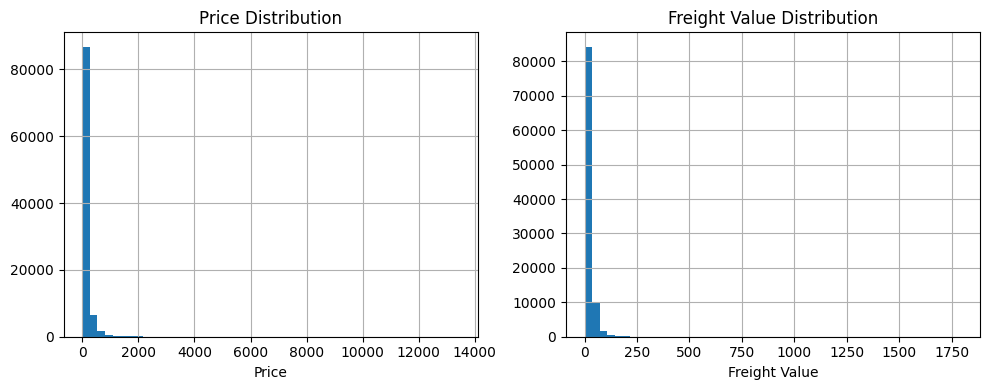

In [26]:
print("Price statistics:")
print(orders['price'].describe())
print("\nFreight value statistics:")
print(orders['freight_value'].describe())

# Check if distance column exists
if 'distance_seller_customer' in orders.columns:
    print("\nDistance seller-customer statistics:")
    print(orders['distance_seller_customer'].describe())
    
    # Plot distribution
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    orders['price'].hist(bins=50)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    
    plt.subplot(1, 3, 2)
    orders['freight_value'].hist(bins=50)
    plt.title('Freight Value Distribution')
    plt.xlabel('Freight Value')
    
    plt.subplot(1, 3, 3)
    orders['distance_seller_customer'].hist(bins=50)
    plt.title('Distance Distribution')
    plt.xlabel('Distance (km)')
    
    plt.tight_layout()
    plt.show()
else:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    orders['price'].hist(bins=50)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    
    plt.subplot(1, 2, 2)
    orders['freight_value'].hist(bins=50)
    plt.title('Freight Value Distribution')
    plt.xlabel('Freight Value')
    
    plt.tight_layout()
    plt.show()

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr(numeric_only=True)` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

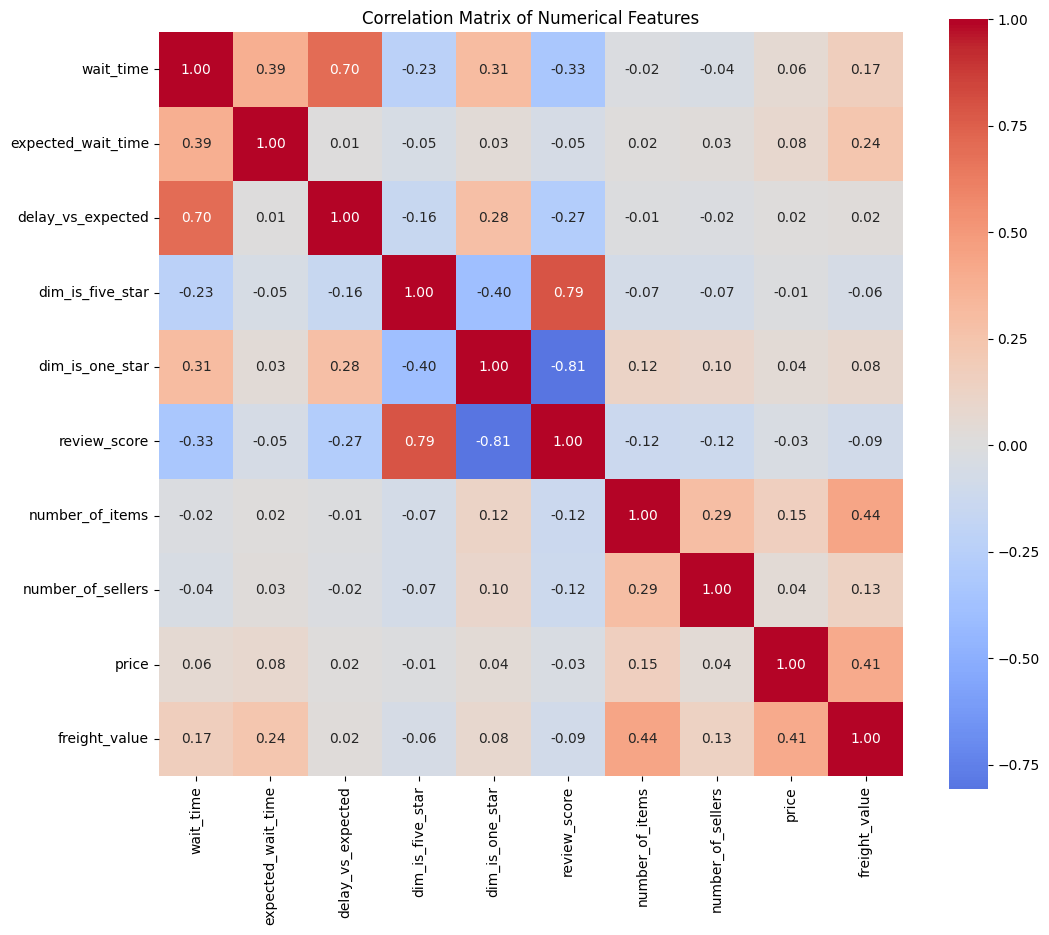

Features most correlated with review_score:
review_score          1.000000
dim_is_one_star       0.807700
dim_is_five_star      0.791787
wait_time             0.333758
delay_vs_expected     0.272281
number_of_items       0.123492
number_of_sellers     0.116942
freight_value         0.090013
expected_wait_time    0.052410
price                 0.034742
Name: review_score, dtype: float64


In [27]:
corr_matrix = orders.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

review_corr = corr_matrix['review_score'].abs().sort_values(ascending=False)
print("Features most correlated with review_score:")
print(review_corr)

* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : - 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (- 27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

In [28]:
sample_size = 10000
orders_sample = orders.sample(n=min(sample_size, len(orders)), random_state=42)

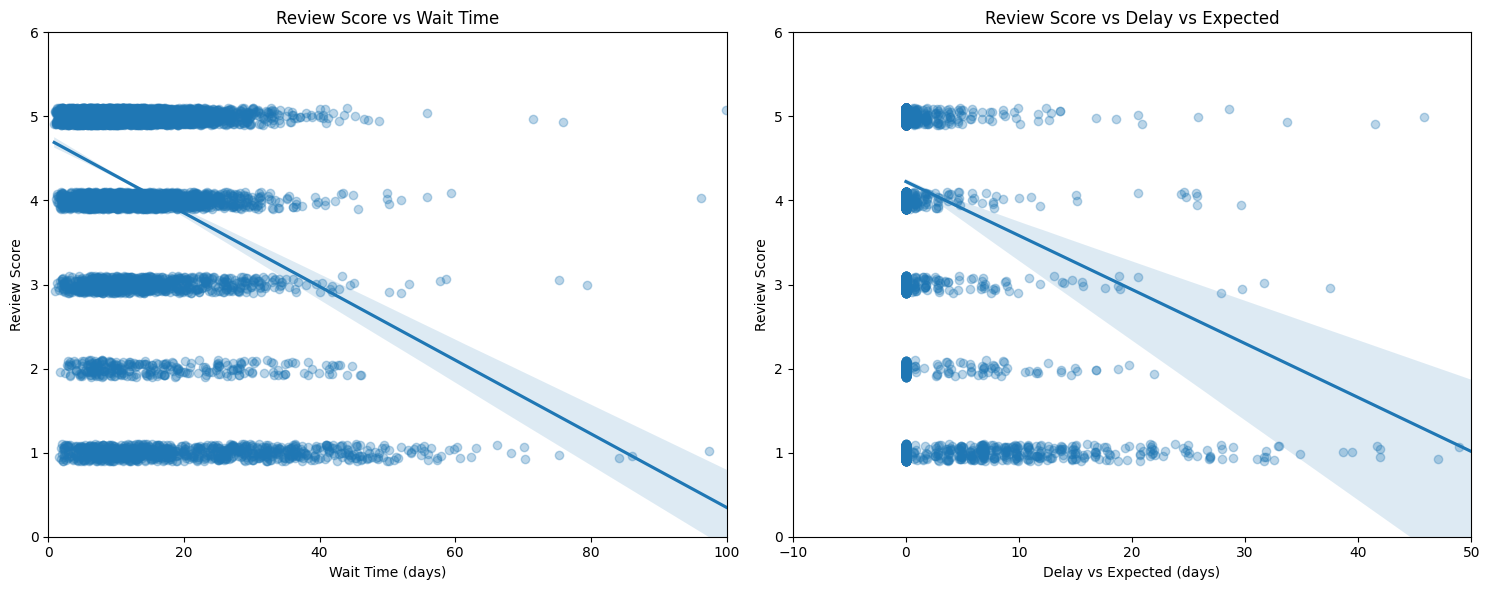

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: review_score vs wait_time
sns.regplot(data=orders_sample, x='wait_time', y='review_score', 
            ax=axes[0], scatter_kws={'alpha':0.3}, y_jitter=0.1)
axes[0].set_xlim(0, 100)  # Limit to hide outliers
axes[0].set_ylim(0, 6)
axes[0].set_title('Review Score vs Wait Time')
axes[0].set_xlabel('Wait Time (days)')
axes[0].set_ylabel('Review Score')

# Plot 2: review_score vs delay_vs_expected
sns.regplot(data=orders_sample, x='delay_vs_expected', y='review_score', 
            ax=axes[1], scatter_kws={'alpha':0.3}, y_jitter=0.1)
axes[1].set_xlim(-10, 50)  # Limit to hide outliers
axes[1].set_ylim(0, 6)
axes[1].set_title('Review Score vs Delay vs Expected')
axes[1].set_xlabel('Delay vs Expected (days)')
axes[1].set_ylabel('Review Score')

plt.tight_layout()
plt.show()

ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

> YOUR ANSWER HERE

<details>
    <summary>▸ Answer</summary>


- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time ? 
    
👉If yes, think about it twice: you may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date !
        
</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95\% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95\% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

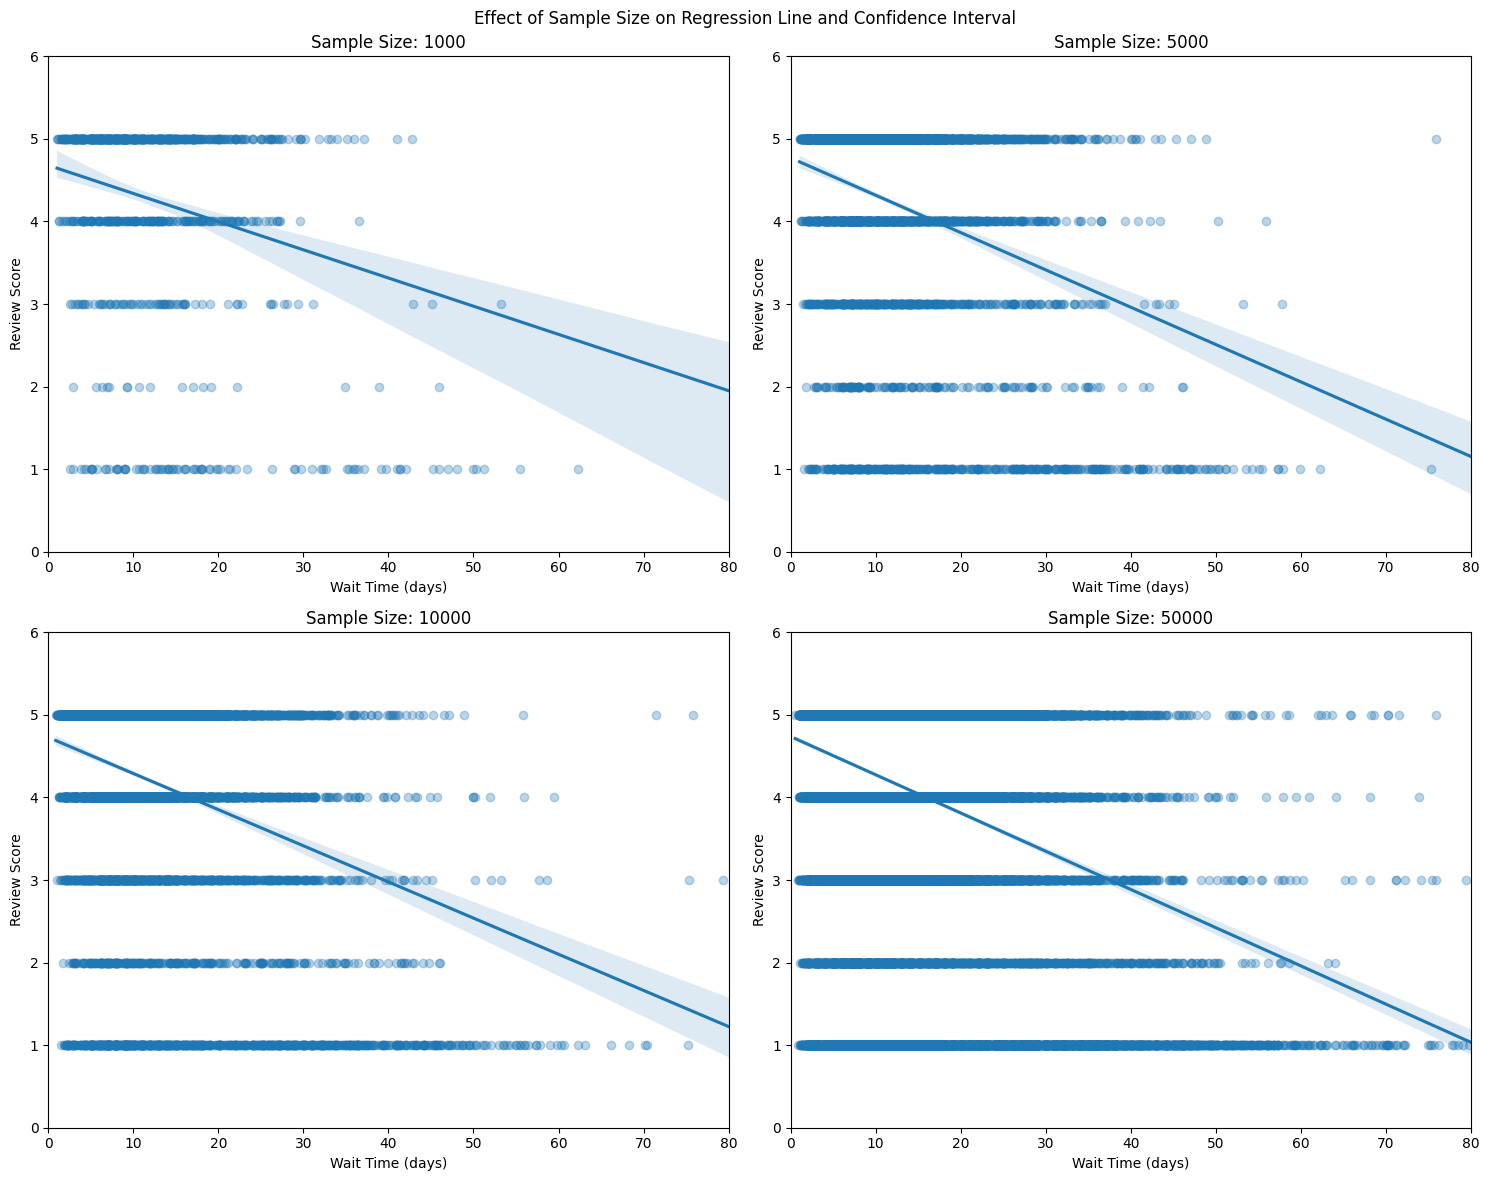

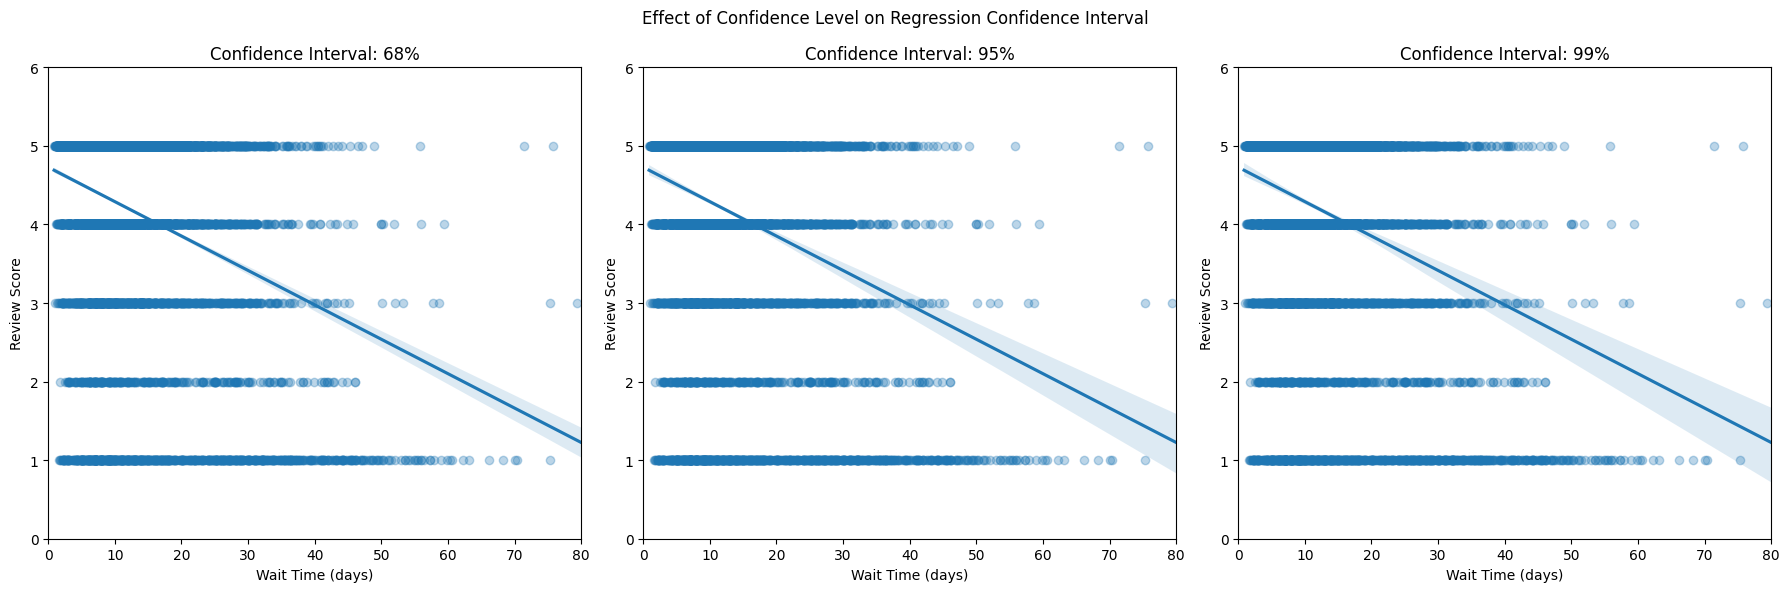

In [31]:
sample_sizes = [1000, 5000, 10000, 50000]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, sample_size in enumerate(sample_sizes):
    current_sample = orders.sample(n=min(sample_size, len(orders)), random_state=42)
    
    sns.regplot(data=current_sample, x='wait_time', y='review_score', 
                ax=axes[i], scatter_kws={'alpha':0.3}, ci=95)
    axes[i].set_xlim(0, 80)
    axes[i].set_ylim(0, 6)
    axes[i].set_title(f'Sample Size: {sample_size}')
    axes[i].set_xlabel('Wait Time (days)')
    axes[i].set_ylabel('Review Score')

plt.suptitle('Effect of Sample Size on Regression Line and Confidence Interval')
plt.tight_layout()
plt.show()

# Different confidence intervals
confidence_levels = [68, 95, 99]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ci in enumerate(confidence_levels):
    sns.regplot(data=orders_sample, x='wait_time', y='review_score', 
                ax=axes[i], scatter_kws={'alpha':0.3}, ci=ci)
    axes[i].set_xlim(0, 80)
    axes[i].set_ylim(0, 6)
    axes[i].set_title(f'Confidence Interval: {ci}%')
    axes[i].set_xlabel('Wait Time (days)')
    axes[i].set_ylabel('Review Score')

plt.suptitle('Effect of Confidence Level on Regression Confidence Interval')
plt.tight_layout()
plt.show()

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the impact of delivery time on review scores is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook